# **Hello Folks**
# **Building the FFNN(Feed Forward Neural Network) for the Telco Customer Churn dataset**

# Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# **Data Loading and Exploration**

In [2]:
url="https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df=pd.read_csv(url)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


as it is observed that we are unable to see all columns as starting and ending columns are visible only middle columns are like ......


In [3]:
# let's resolve this columns issues in our dataset (let me use here set_option)

pd.set_option("display.max_columns",None)  # to show all columns
pd.set_option("display.expand_frame_repr",False) # works like a wrap_text in excel
pd.set_option("max_colwidth",None)  # provide the column name in one line

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Informational Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# as there is no null values in our dataset but as observed that the datatypes of the some columns are not as per the column values , such as "TotalCharges" having numeric values and dtype is of object so let's correct those

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['gender']=df['gender'].map({'Female':0,'Male':1})
df['Churn']=df['Churn'].map({'No':0,'Yes':1})

In [8]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


# Checking for Nulls and duplicacy

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.duplicated().sum()

0

# Libraries Used :-

In [13]:
import time
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

# As we can see we have 21 nos of features in our dataset , giving all the features to model will lead to overfitting and increases hard work on the resources , therefore feature engineering techniques like RFE can be used to reduce the nos of features (baseline selecting the most important features only)

# **RFE-Recursive Feature Elimination**

# why RFE - cause RFE works best with every kind of dataset

In [14]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Selected Features by RFE : ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


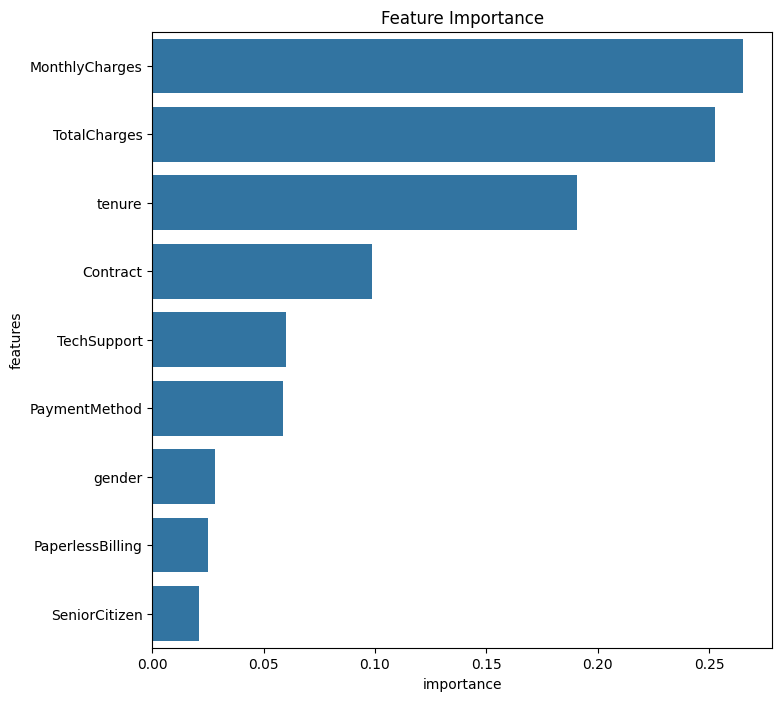

Time taken by this cell : 12.186779499053955


In [15]:
start=time.time()

#potential fetaures
numerical_features=['gender','SeniorCitizen','tenure','TechSupport','Contract'
                    ,'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

#factorize
for col in numerical_features:
   if df[col].dtype =="object":
             df[col]=pd.factorize(df[col])[0]

#validation step
numerical_features=[f for f in numerical_features if f in df.columns]

x=df[numerical_features]
y=df['Churn']

#implementing the RFE
rf=RandomForestClassifier(n_estimators=120,random_state=42)
rfe=RFE(estimator=rf, n_features_to_select=5)
rfe.fit(x,y)

selected_features=[feature for feature, selected in zip(numerical_features,rfe.support_) if selected]
print(f"Selected Features by RFE : {selected_features}")

rf.fit(x,y)
importances=pd.DataFrame({'features':numerical_features,'importance':rf.feature_importances_})
importances=importances.sort_values('importance',ascending=False)
importances

#plotting
plt.figure(figsize=(8,8))
sns.barplot(x='importance',y='features',data=importances)
plt.title("Feature Importance")
plt.show()

end=time.time()
print(f"Time taken by this cell : {end-start}")

In [16]:
selected_features

['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Model Building

In [17]:
X=df[selected_features]
Y=df['Churn']

#Splitting (train_test_split)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

#standardization required
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
#for saving the scaled values we use pickle
with open('scaler.pkl','wb') as f:
     pickle.dump(scaler,f)

# As keras-tuner is required for further

In [19]:
! pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


# Libraries Required : -

In [20]:
import tensorflow as tf
from tensorflow.keras import layers,models
import keras_tuner as kt

# **Building a Neural Network model**

In [21]:
# initial model

def create_model(hp=None):
  if hp:
    model=models.Sequential()

    #first layer
    model.add(layers.Dense(
        units=hp.Choice('units_1',values=[32,64,128]),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],),
    ))

    #Optional second layer
    if hp.Boolean('second_layer'):
      model.add(layers.Dense(
          units=hp.Choice('units_2',values=[16,32]),
          activation='relu'
      ))

    #Optional third layer
    if hp.Boolean('third_layer'):
      model.add(layers.Dense(
          units=hp.Choice('units_3',values=[8,16]),
          activation='relu'
      ))

    #output layer
    model.add(layers.Dense(1,activation='sigmoid'))

    #compile
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

  else:
    model=models.Sequential([
        layers.Dense(64,activation='relu',input_shape=(X_train_scaled.shape[1],)),
        layers.Dense(32,activation='relu'),
        layers.Dense(16,activation='relu'),
        layers.Dense(8,activation='relu'),
        layers.Dense(1,activation='sigmoid')
    ])

    #compile
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
  return model

# building initial model
initial_model=create_model()
initial_model.summary()

history=initial_model.fit(X_train_scaled,Y_train,epochs=50,batch_size=20,validation_split=0.20,verbose=1 )

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7483 - loss: 0.5234 - val_accuracy: 0.7742 - val_loss: 0.4369
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7752 - loss: 0.4436 - val_accuracy: 0.7876 - val_loss: 0.4317
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7939 - loss: 0.4316 - val_accuracy: 0.7787 - val_loss: 0.4316
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7878 - loss: 0.4417 - val_accuracy: 0.7867 - val_loss: 0.4376
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7622 - loss: 0.4625 - val_accuracy: 0.7902 - val_loss: 0.4356
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7965 - loss: 0.4228 - val_accuracy: 0.7884 - val_loss: 0.4313
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7922 - loss: 0.4275 - val_accuracy: 0.7813 - val_loss: 0.4265
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4382 - val_accuracy: 

# **Let's see the Losses and Accuracy of the Initial_model**

In [22]:
loss,accuracy=initial_model.evaluate(X_test_scaled,Y_test)
print(f"Test Loss : {loss}")
print((f"Accuracy : {accuracy}"))

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8170 - loss: 0.3989
Test Loss : 0.4058496356010437
Accuracy : 0.8081023693084717


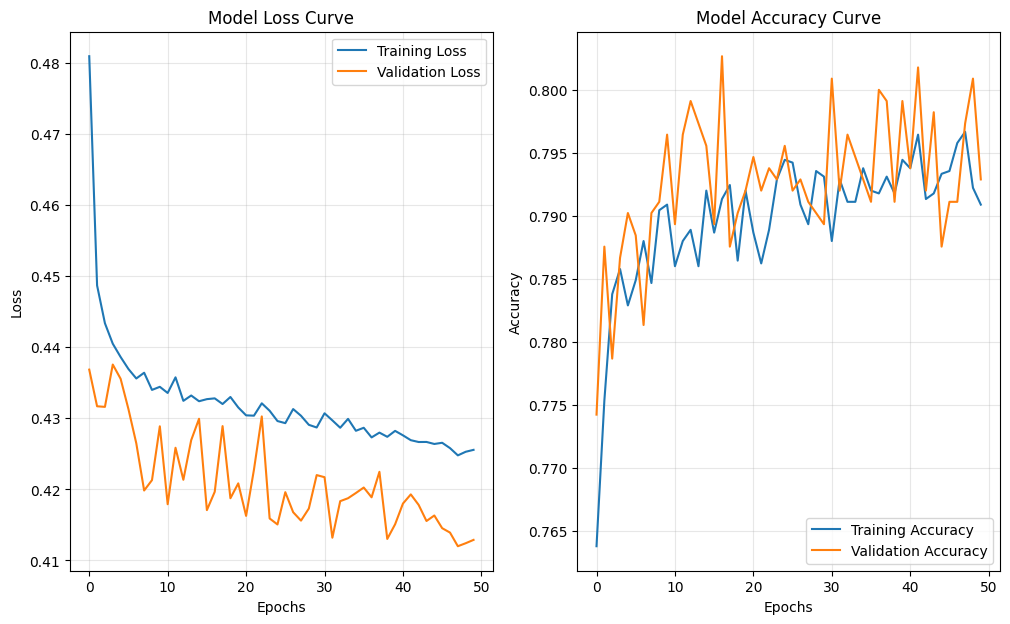

In [23]:
# plot the visual

# for loss
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss Curve")
plt.legend()
plt.grid(alpha=0.3)

# for Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Curve")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

# **Hyper-parameter Tuning**

Trial 5 Complete [00h 00m 12s]
val_accuracy: 0.7946666479110718

Best val_accuracy So Far: 0.7964444160461426
Total elapsed time: 00h 01m 10s
Best hyperparameters found :
units_1 : 64
second_layer : True
third_layer : True
units_2 : 16
units_3 : 8
Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6206 - loss: 0.6356 - val_accuracy: 0.7787 - val_loss: 0.4364
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.4367 - val_accuracy: 0.7920 - val_loss: 0.4412
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7882 - loss: 0.4391 - val_accuracy: 0.7867 - val_loss: 0.4338
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7767 - loss: 0.4406 - val_accuracy: 0.7840 - val_loss: 0.4291
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.4390 - val_accuracy: 0.7884 - val_loss: 0.4304
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7838 - loss: 0.4368 - val_accuracy: 0.7831 - 

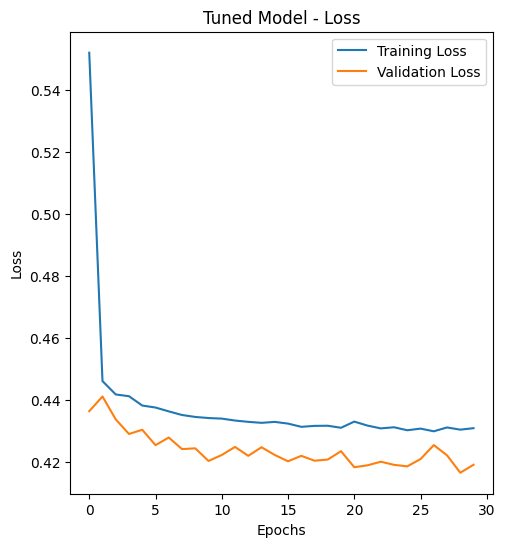

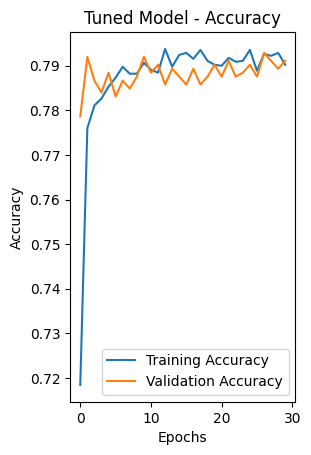


Model Comparison:
Initial Model Accuracy : 0.8081
Tuned Model Accuracy : 0.8038
Improvement : -0.43%


In [24]:
print("**"*10)
print("Hyperparameter Tuning")
print("**"*10)

# keras_tuner.RandomSearch
tuner=kt.RandomSearch(create_model,objective='val_accuracy',max_trials=5,
                      directory='keras_tuning',project_name='Churn_Prediction')

# Early-Stopping required to save time ( when losses are not decreasing consistently or accuracy not increasing consistently)
stop_early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

# building a tuner model
tuner.search(X_train_scaled,Y_train,
             epochs=20,validation_split=0.20,
             callbacks=[stop_early],verbose=1)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters found :")
for param in best_hps.values:
  print(f"{param} : {best_hps.get(param)}")

best_model=tuner.hypermodel.build(best_hps)
best_history=best_model.fit(X_train_scaled,Y_train,
                            epochs=30,
                            batch_size=32,
                            validation_split=0.20,
                            verbose=1)

best_loss,best_accuracy=best_model.evaluate(X_test_scaled,Y_test)

print(f"Tuned Model - Test Loss : {best_loss}")
print(f"Tuned Model - Accuracy : {best_accuracy} ")

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(best_history.history['loss'],label="Training Loss")
plt.plot(best_history.history['val_loss'],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Tuned Model - Loss")
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(best_history.history['accuracy'],label="Training Accuracy")
plt.plot(best_history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Tuned Model - Accuracy")
plt.legend()
plt.show()

print("\nModel Comparison:")
print(f"Initial Model Accuracy : {accuracy:.4f}")
print(f"Tuned Model Accuracy : {best_accuracy:.4f}")
print(f"Improvement : {(best_accuracy - accuracy)*100:.2f}%")

# **Saving the model intelligence**

basically the weights and biases of the model

In [25]:
# saving the model file

best_model.save("best_model.h5")  # old legacy method but still useful in 2025

# best_model.save("best_model_new.keras") # can use this code also

In [26]:
# Saving the selected_features

with open('selected_features.pkl','wb') as file:  # 'wb'  == write binary
  pickle.dump(selected_features,file)

# **Using the Model Intelligence and other saved files**

In [27]:
# consuming the saved model and others

def load_model_component():
  # load model saved .h5 format
  model=tf.keras.models.load_model('best_model.h5') # for G-Collab we use the file name for on device we use the file path

  #load scaler
  with open('scaler.pkl','rb') as file:     # 'rb' == read binary
    scaler=pickle.load(file)

  # load selected_features
  with open('selected_features.pkl', 'rb') as file :
    selected_features=pickle.load(file)

  return model,scaler,selected_features

# **Predictions**

In [28]:
# predictions

 # *args and *kwargs

def predict_churn(*args):
  model,scaler,selected_features=load_model_component()

  input_data=pd.DataFrame([args],columns=selected_features)

  #scale the data
  input_scaled=scaler.transform(input_data)

  # make predictions
  prediction=model.predict(input_scaled)[0][0]

  probability=float(prediction)
  churn_status='Yes' if probability > 0.5 else "No"

  return{
      'Churn Probability':probability,
      'Will Churn' : churn_status
  }

# **Using Gradio as the Front-end to interact with the model**

In [29]:
! pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


# **Libraries**

In [30]:
import gradio as gr
import os

# Gradio is used as a user interface for the prediction


In [31]:
selected_features

['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

In [32]:
def create_gradio_interface():
  _,_,selected_features=load_model_component()

  inputs=[]
  for feature in selected_features:
    # binary
    if feature in ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']:
      inputs.append(gr.Radio(label=feature, choices=[0,1], info="0=No/Female, 1=Yes/Male"))
    #numericals
    else:
      inputs.append(gr.Slider(minimum=0,maximum=100 if feature == 'tenure' else 200 , label=feature))

  interface=gr.Interface(
                         fn=predict_churn,
                         inputs=inputs,
                         outputs=gr.JSON(label="Churn Prediction"),
                         description="Churn prediction Neural Network Demo Code, Kindly use Slider and Radio button to feed data !",
                         theme='huggingface',
                         examples=[[1,0,1,30,2500]] if len(selected_features)==5 else None
                           )
  return interface

In [33]:
interface=create_gradio_interface()

# **Launching and Closing of the Gradio**

In [34]:
# for launching
interface.launch()

# for closing
#interface.close()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a909501efbd076b6c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Function for Prediction**

In [35]:
# can also make the function for prediction

def demo_to_check():
    model,scaler,selected_feature=load_model_component()

    #sample_data
    sample_customer=pd.DataFrame([[1,0,1,300,2900]],columns=selected_features)

    #sample_sacled
    sample_scaled=scaler.transform(sample_customer)

    #prediction
    prediction=model.predict(sample_scaled)[0][0]

    print(f"\nSample Prediction for : {selected_features}")
    print(f"Churn Probability : {prediction}")
    print(f"Will Churn : {'Yes' if prediction>0.5 else 'No'}")

demo_to_check()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step

Sample Prediction for : ['tenure', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Churn Probability : 0.8609042763710022
Will Churn : Yes
